<a href="https://colab.research.google.com/github/LucasMonteiroBastos/Projeto_Analise_Censo/blob/main/CENSO_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O projeto busca entender, com base na informações se uma pessoa ganha ou não acima de 50k por mês.


In [ ]:
# Libs necessarias 

# Modelagem
import pandas as pd
import numpy as np

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

In [ ]:
# Carregando os Dados
baseDeDadosCenso = pd.read_csv('/content/census.csv')

In [ ]:
# Lendos os Dados
baseDeDadosCenso

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Analisando os valores de Estatisfica
baseDeDadosCenso.describe()

# ---MEDIA---
# (age)idade: 38 anos  
# (education-num)anos de estudo: 10 anos   
# (capital-gain	)ganho de capital: 1077   
# (capital-loos)perda de capital: 87                       
# (hour-per-week)horas trabalhadas: 40 horas

#---MIN---MAX
# (age): 17 - 90
# (education-num): 1 - 16
# (hour-per-week): 1 - 99


,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Verificando valores faltantes
baseDeDadosCenso.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [ ]:
# Verificando o valor da classe
np.unique(baseDeDadosCenso['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

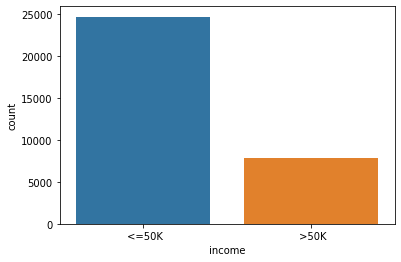

In [ ]:
# Verificando a distribuição
sns.countplot(x= baseDeDadosCenso['income']);

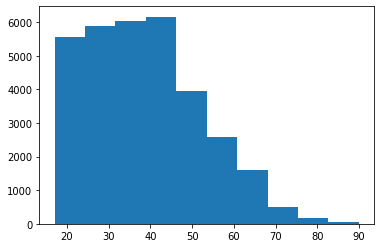

In [ ]:
# Analisando a distribuição das idades
plt.hist(x= baseDeDadosCenso['age']);

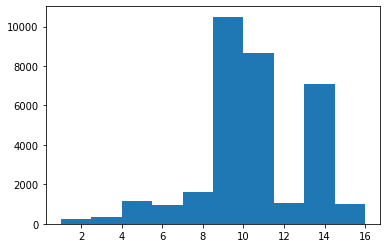

In [ ]:
# Distrituição de numeros de anos estudados
plt.hist(x= baseDeDadosCenso['education-num']);

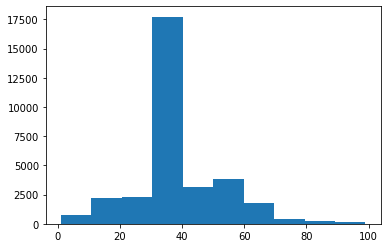

In [ ]:
# Distribuição de horas trabalhadas por semana
plt.hist(x= baseDeDadosCenso['hour-per-week']);

In [ ]:
# Distribuição de Tipo de Serviço
grafico = px.treemap(baseDeDadosCenso, path=['workclass'])
grafico.show()

In [ ]:
grafico = px.treemap(baseDeDadosCenso, path=['occupation', 'age'])
grafico.show()

In [ ]:
# Categorias paralelas
grafico = px.parallel_categories(baseDeDadosCenso, dimensions=['education', 'income'])
grafico.show()

In [ ]:
# Divisão em previsores e class
# X previsor
X_census = baseDeDadosCenso.iloc[:, 0:14].values

In [ ]:
# Y classe
y_census = baseDeDadosCenso.iloc[:, 14].values

Tratamento de atributos categorios (Transformar String em Numericos)

In [ ]:
# Libs sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [ ]:
# variavel que ta recebendo uma instacia de LabelEncoder()
label_encoder_test = LabelEncoder()

# varialvel que ta recebendo a transformação de string para numero ( recebendo o parametro X_census#)
teste = label_encoder_test.fit_transform(X_census[:,1])

In [ ]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [ ]:
# transformando todos de forma unitaria
label_encoder_worclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
# transformando
X_census[:, 1] = label_encoder_worclass.fit_transform(X_census[:,1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:, 9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:, 13] = label_encoder_country.fit_transform(X_census[:,13])

In [ ]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# transformando as colunas
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')



In [ ]:
  # transformando as colunas

  X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
# Escalonamento dos atributos: --->> Deixar os valores na mesma escala
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [ ]:
X_census.shape

(32561, 108)

In [ ]:
  from sklearn.model_selection import train_test_split

In [ ]:
# Dividindo as bases, X Treino e X Teste / y treino e y teste --->> 85% treino 15% teste
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

Salvando as variaveis em disco

In [ ]:
import pickle

In [ ]:
  # Salvando as variaveis em disco
  with open('census.pkl', mode ='wb') as f:
    pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste],f)